> #### *This dataset has funding information of the Indian startups from January 2015 to recent 2020. It includes columns with the date funded, the city the startup is based out of, the names of the funders, and the amount invested (in USD)*[](http://)

Interactive WebApp Link: [https://share.streamlit.io/satyampd/startups-in-india-eda/app.py](https://share.streamlit.io/satyampd/startups-in-india-eda/app.py)
> You can change the numbers in above WebApp, eg., you can see top 3 or top 15 within same image using slidebar.


WebApp has been created using open-source app framework called streamlit, with the help of streamlit we can create web-interface within few hours, also we can deploy the app within miniutes using https://share.streamlit.io/

Code for app can be found here: https://github.com/Satyampd/Startups-in-India-EDA/blob/master/app.py
> Note: Code is almost same as this notebook, it just has 5-10 extra lines of code for streamlit.

In [44]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [45]:
import plotly.graph_objects as go
import matplotlib.pyplot as plt

### **Reading the datset and setting the name of columns with data.columns**

In [46]:
data=pd.read_csv('datasets/startup.csv')
data.columns=['SNo', 'Date', 'StartupName', 'IndustryVertical', 'SubVertical',
       'CityLocation', 'InvestorsName', 'InvestmentType', 'AmountInUSD',
       'Remarks']

In [19]:
#Lets look the shape of dataset
data.shape

(3044, 10)

In [20]:
#Now, Lets have a view at top two rows of dataset
data.head(2)

,SNo,Date,StartupName,IndustryVertical,SubVertical,CityLocation,InvestorsName,InvestmentType,AmountInUSD,Remarks
0,1,09/01/2020,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,"20,00,00,000",NaN
1,2,13/01/2020,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,"80,48,394",NaN


## **Lets remove inconsistency**


In [47]:
data['StartupName'] = data['StartupName'].apply(lambda x: (str(x).replace("\\\\","")))
data['StartupName'] = data['StartupName'].apply(lambda x: (str(x).replace("\"","")))

In [48]:
for i in range(0,len(data["IndustryVertical"])):
    if data["IndustryVertical"][i] in ["ECommerce",
                                       "ecommerce",
                                       "Ecommerce", 
                                       "E-Commerce",
                                       "E-commerce"]:
        data["IndustryVertical"][i]="eCommerce"
        
for i in range(0,len(data["StartupName"])):
    if data["StartupName"][i] in ["Ola",
                                  "Ola Cabs", 
                                  "Olacabs"]:
        data["StartupName"][i]="Ola"  
    elif data["StartupName"][i] =="Flipkart.com":
        data["StartupName"][i]="Flipkart"    
    elif data["StartupName"][i] =="Paytm Marketplace":
        data["StartupName"][i]="Paytm"   
for i in range(0,len(data["StartupName"])):
  if data["InvestorsName"][i] in ['Undisclosed investors',
                                  'Undisclosed Investors',
                                  'Undisclosed',
                                  'Undisclosed investor',
                                  'Undisclosed Investor',
                                  'undisclosed investors']:
    data["InvestorsName"][i]="Undisclosed"
    
for i in range(0,len(data["StartupName"])):
    if data["StartupName"][i] in ["OYO",
                                  "OYO Rooms", 
                                  "OyoRooms", 
                                  "Oyorooms", 
                                  "Oyo",
                                 "Oyo Rooms"]:
        data["StartupName"][i]= "OYO Rooms"
    elif data["StartupName"][i] in ["Byjuxe2x80x99s",
                                    "BYJU'S"]:
        data["StartupName"][i]= "Byju's"    
    
for i in range  (0,len(data["CityLocation"])):
    if data["CityLocation"][i] in ["New Delhi",
                                   "Delhi",
                                   "Noida", 
                                   "Gurugram",
                                   "Gurgaon"]:
        data["CityLocation"][i]="NCR"
    elif data["CityLocation"][i]=="Bangalore":
        data["CityLocation"][i]="Bengaluru"

data.loc[data['CityLocation'].isin(['\\\\xc2\\\\xa0Noida', '\\xc2\\xa0Noida']), 'CityLocation'] = 'Noida'
data.loc[data['CityLocation'].isin(['\\\\xc2\\\\xa0Bangalore', '\\xc2\\xa0Bangalore', 'Bangalore']), 'CityLocation'] = 'Bengaluru'
data.loc[data['CityLocation'].isin(['\\\\xc2\\\\xa0New Delhi', '\\xc2\\xa0New Delhi']), 'CityLocation'] = 'New Delhi'
data.loc[data['CityLocation'].isin(['\\\\xc2\\\\xa0Gurgaon', 'Gurugram']), 'CityLocation'] = 'Gurgaon'
data.loc[data['CityLocation'].isin(['\\\\xc2\\\\xa0Mumbai', '\\xc2\\xa0Mumbai']), 'CityLocation'] = 'Mumbai'
        

data.loc[data['IndustryVertical'] == "\\\\xc2\\\\xa0News Aggregator mobile app", 'IndustryVertical'] = 'News Aggregator mobile app'
data.loc[data['IndustryVertical'] == "\\\\xc2\\\\xa0Online Jewellery Store", 'IndustryVertical'] = 'Online Jewellery Store'
data.loc[data['IndustryVertical'] == "\\\\xc2\\\\xa0Fashion Info Aggregator App", 'IndustryVertical'] = 'Fashion Info Aggregator App'
data.loc[data['IndustryVertical'] == "\\\\xc2\\\\xa0Online Study Notes Marketplace", 'IndustryVertical'] = 'Online Study Notes Marketplace'
data.loc[data['IndustryVertical'] == "\\\\xc2\\\\xa0Warranty Programs Service Administration", 'IndustryVertical'] = 'Warranty Programs Service Administration'
data.loc[data['IndustryVertical'] == "\\\\xc2\\\\xa0Pre-School Chain", 'IndustryVertical'] = 'Pre-School Chain'
data.loc[data['IndustryVertical'] == "\\\\xc2\\\\xa0Premium Loyalty Rewards Point Management", 'IndustryVertical'] = 'Premium Loyalty Rewards Point Management'
data.loc[data['IndustryVertical'] == "\\\\xc2\\\\xa0Contact Center Software Platform", 'IndustryVertical'] = 'Contact Center Software Platform'
data.loc[data['IndustryVertical'] == "\\\\xc2\\\\xa0Casual Dining restaurant Chain", 'IndustryVertical'] = 'Casual Dining restaurant Chain'
data.loc[data['IndustryVertical'] == "\\\\xc2\\\\xa0Online Grocery Delivery", 'IndustryVertical'] = 'Online Grocery Delivery'
data.loc[data['IndustryVertical'] == "Online home d\\\\xc3\\\\xa9cor marketplace", 'IndustryVertical'] = 'Online home decor marketplace'
data.loc[data['IndustryVertical'].isin(["Fin-Tech"]), 'IndustryVertical'] = 'FinTech'   

data.loc[data['InvestorsName'].isin(['Undisclosed investors', 'Undisclosed', 'undisclosed investors', 'Undisclosed Investor', 'Undisclosed investors']), 'InvestorsName'] = 'Undisclosed Investors'
data.loc[data['InvestorsName'] == "\\\\xc2\\\\xa0Tiger Global", 'InvestorsName'] = 'Tiger Global'
data.loc[data['InvestorsName'] == "\\\\xc2\\\\xa0IndianIdeas.com", 'InvestorsName'] = 'IndianIdeas'
data.loc[data['InvestorsName'] == "\\\\xc2\\\\xa0IvyCap Ventures, Accel Partners, Dragoneer Investment Group", 'InvestorsName'] = 'IvyCap Ventures, Accel Partners, Dragoneer Investment Group'
data.loc[data['InvestorsName'] == "\\\\xc2\\\\xa0Goldman Sachs", 'InvestorsName'] = 'Goldman Sachs'

#Recent cleaning code is taken from  from jagannathrk notebook.

> ### One has to be mindful that in Python (or NumPy), the nan's don’t compare equal, but None's do.

In [23]:
# Lets see percentage of present values in every column
#data.isnull().sum()
p=((data.count()/data.isna().count())*100)
display(p)
# Alternate: Lets see percentage of missing values in every column
m=(100-(data.count()/data.isna().count())*100)
display(m)

SNo                 100.000000
Date                100.000000
StartupName         100.000000
IndustryVertical     94.382392
SubVertical          69.250986
CityLocation         94.086728
InvestorsName        99.211564
InvestmentType       99.868594
AmountInUSD          68.462549
Remarks              13.764783
dtype: float64

SNo                  0.000000
Date                 0.000000
StartupName          0.000000
IndustryVertical     5.617608
SubVertical         30.749014
CityLocation         5.913272
InvestorsName        0.788436
InvestmentType       0.131406
AmountInUSD         31.537451
Remarks             86.235217
dtype: float64

In [49]:
# As we can see, Remarks column has the 86.235217% missing value, so we will drop it.
data.drop("Remarks", axis=1, inplace=True)

## **Now explore about IndustryVertical (Industry they belong)**

In [25]:
IV=data.IndustryVertical
data.IndustryVertical.nunique()

815

#### There are total 815 unique industry vertical, but here we will focus on top 10

In [26]:
label10=np.arange(0,10)
top=data["IndustryVertical"].value_counts().head(10)
fig=go.Figure(data=[go.Bar(y=top.values,x=top.index, marker={'color':label10})])
fig.update_layout(autosize=True ,plot_bgcolor='rgb(275, 275, 275)')
fig.data[0].marker.line.width = 3
fig.data[0].marker.line.color = "black"  
fig

In [27]:
data.head()

,SNo,Date,StartupName,IndustryVertical,SubVertical,CityLocation,InvestorsName,InvestmentType,AmountInUSD
0,1,09/01/2020,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,"20,00,00,000"
1,2,13/01/2020,Shuttl,Transportation,App based shuttle service,NCR,Susquehanna Growth Equity,Series C,"80,48,394"
2,3,09/01/2020,Mamaearth,eCommerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,"1,83,58,860"
3,4,02/01/2020,https://www.wealthbucket.in/,FinTech,Online Investment,NCR,Vinod Khatumal,Pre-series A,"30,00,000"
4,5,02/01/2020,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,"18,00,000"


## Lets explore the amount of Funding startups received

In [12]:
display(data["AmountInUSD"][0])
display(data["AmountInUSD"][0]*2)

'20,00,00,000'

'20,00,00,00020,00,00,000'

In [13]:
# As we can, column's values are working as String. 

In [14]:
import re

data.drop([2602,2603,2604,2605,2606,2607,2608,2609,2610,2611], inplace = True)
data.reset_index(drop=True, inplace=True)

for i in range (0, len(data["AmountInUSD"])):
    data["AmountInUSD"][i]=re.sub('\D',"",str(data["AmountInUSD"][i]))
data["AmountInUSD"]=pd.to_numeric(data["AmountInUSD"])

for i in range (0, len(data["StartupName"])):
    data["StartupName"][i]=re.sub('xc2xa0',"",str(data["StartupName"][i]))

In [15]:
temp=data[["StartupName","AmountInUSD"]].groupby("StartupName").sum().sort_values(by="AmountInUSD", ascending=False)
top=temp.head(10)
print(top)

                   AmountInUSD
StartupName                   
Flipkart          4.759700e+09
Rapido Bike Taxi  3.900000e+09
Paytm             3.348950e+09
Ola               2.054200e+09
Pratilipi         1.515250e+09
OYO Rooms         9.970000e+08
Udaan             8.700000e+08
Snapdeal          7.000000e+08
True North        6.000000e+08
BigBasket         5.070000e+08


Rapido data is wrong, it is in INR.
> Link to article: [Bike taxi app Rapido raises Rs 391 Cr](https://yourstory.com/2019/08/startup-funding-bike-taxi-app-rapido-series-b-westbridge-capital)

In [16]:
data["AmountInUSD"][data["StartupName"]=="Rapido Bike Taxi"]=data["AmountInUSD"]/71.19
temp=data[["StartupName","AmountInUSD"]].groupby("StartupName").sum().sort_values(by="AmountInUSD", ascending=False)
top=temp.head(10)
print(top)

              AmountInUSD
StartupName              
Flipkart     4.759700e+09
Paytm        3.348950e+09
Ola          2.054200e+09
Pratilipi    1.515250e+09
OYO Rooms    9.970000e+08
Udaan        8.700000e+08
Snapdeal     7.000000e+08
True North   6.000000e+08
BigBasket    5.070000e+08
FabHotels    4.969976e+08


In [17]:
label10=np.arange(0,10)
fig=go.Figure(data=[go.Bar(y=top.AmountInUSD,x=top.index, marker={'color':label10})])
fig.update_layout(autosize=True ,plot_bgcolor='rgb(275, 275, 275)')
fig.data[0].marker.line.width = 3
fig.data[0].marker.line.color = "black" 
fig.show()

## **Lets see the Pie-chart for top 7 different types of Funding**

In [18]:
data['InvestmentType'] = data['InvestmentType'].apply(lambda x: (str(x).replace("\\\\n"," ")))
                                                                                   
for i in range(0, len(data["InvestmentType"])):
    if data["InvestmentType"][i] in ["Seed/ Angel Funding","Seed / Angel Funding","Seed/Angel Funding",
                                       "Seed / Angle Funding", "Angel / Seed Funding"]:
        data["InvestmentType"][i]="Seed Angel Funding"
    
  

typ=data["InvestmentType"].value_counts().head(7)


In [19]:
colrs = ['gold', 'mediumturquoise', 'darkorange', 'lightgreen']

fig=go.Figure(data=[go.Pie(labels=typ.index,values=typ.values)])
fig.update_traces(hoverinfo='label+percent', textinfo='label+percent', textfont_size=10,
                  marker=dict(colors=colrs))
fig.data[0].marker.line.width = 3
fig.data[0].marker.line.color = "black"                
fig.update_layout(height=600,autosize=True ,plot_bgcolor='rgb(275, 275, 275)')
fig.show()

## **Top 10 Investors**

In [20]:
i=data['InvestorsName'].value_counts().head(11).reset_index()
i.columns=["InvestorsName", "Number"]
i.head(2)

,InvestorsName,Number
0,Undisclosed Investors,112
1,Ratan Tata,25


In [21]:
# We will remove Undisclosed row
i.drop(0,axis=0,inplace=True)

In [22]:
fig=go.Figure(data=[go.Scatter(x=i.InvestorsName,y=i.Number,mode='markers',marker_size=(i.Number)*3,  marker={'color':label10})])
fig.update_layout(autosize=True ,plot_bgcolor='rgb(275, 275, 275)')
fig.data[0].marker.line.width = 3
fig.data[0].marker.line.color = "black"
fig.show()

## **Top 10 Cities with Highest number of Startups**

In [23]:
cities=data["CityLocation"].value_counts().head(10).reset_index()
cities.columns=["City","Number"]
fig=go.Figure(data=[go.Scatter(x=cities.City,y=cities.Number,mode='markers',marker_size=(cities.Number)/6,  marker={'color':label10})])
fig.data[0].marker.line.width = 3
fig.data[0].marker.line.color = "black" 
fig.update_layout(autosize=True,plot_bgcolor='rgb(275, 275, 275)')
fig.show()

## **Lets see most common words in SubVertical using WordCloud**

In [24]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [25]:
text=[]
for i in range (0, len(data["SubVertical"])):
  if type(data["SubVertical"][i])==str:
    text.append(data["SubVertical"][i])
   
text=" ".join(text) 
text = text.split(" ")
# text=set(text)
text=" ".join(text) 

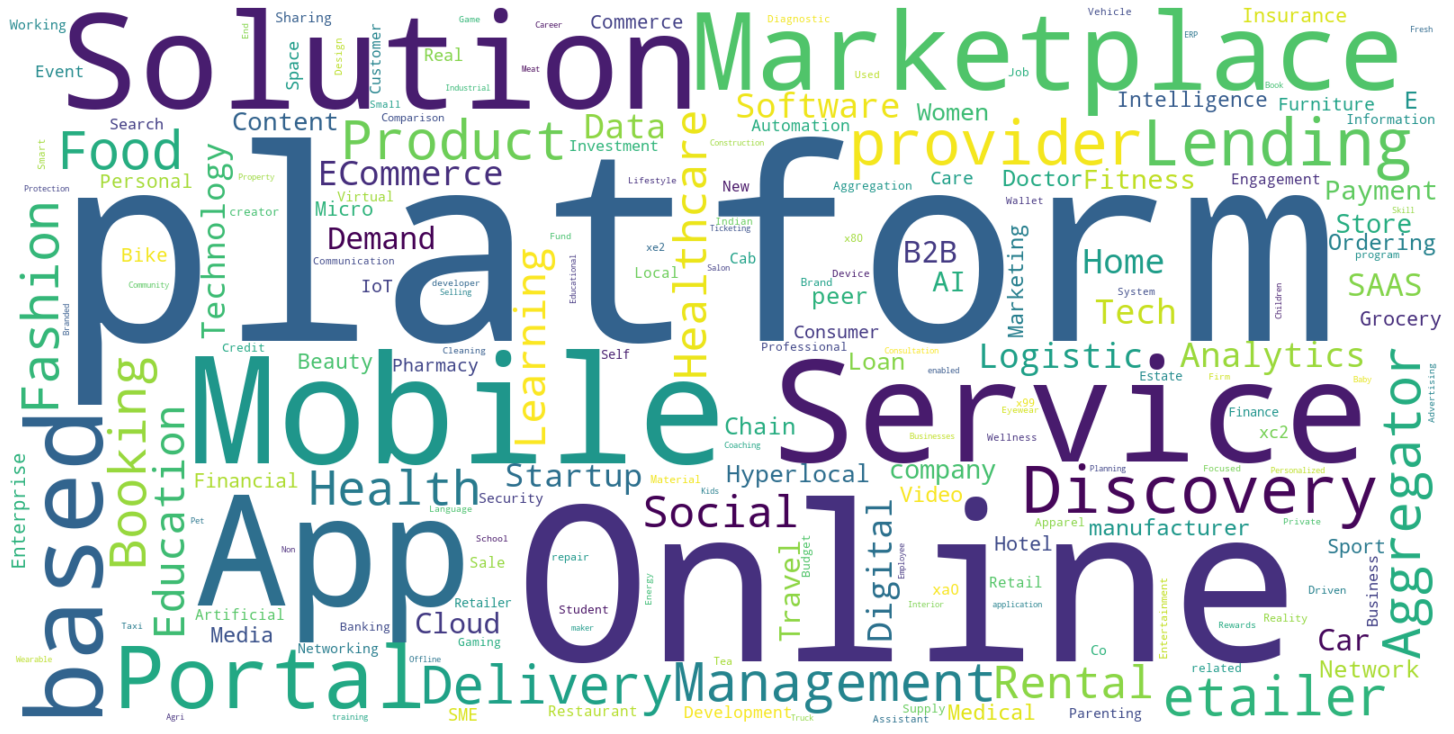

In [26]:
wordcloud = WordCloud( max_words=200, background_color="white",collocations=False, width=1600, height=800).generate(text)
plt.figure(figsize=(20,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

### **End of Notebook**

In [50]:
data['Date'][data['Date']=='12/05.2015'] = '12/05/2015'
data['Date'][data['Date']=='13/04.2015'] = '13/04/2015'
data['Date'][data['Date']=='15/01.2015'] = '15/01/2015'
data['Date'][data['Date']=='22/01//2015'] = '22/01/2015'
data['Date'][data['Date']=='05/072018'] = '05/07/2018'
data['Date'][data['Date']=='01/07/015'] = '01/07/2015'
data['Date'][data['Date']=='\\\\xc2\\\\xa010/7/2015'] = '10/07/2015'

In [54]:
data['year'] = pd.DatetimeIndex(data['Date']).year

In [66]:
data.groupby('year').count()

,SNo,Date,StartupName,IndustryVertical,SubVertical,CityLocation,InvestorsName,InvestmentType,AmountInUSD
year,,,,,,,,,
2015,936,936,936,765,0,762,930,936,658
2016,993,993,993,993,993,988,993,993,586
2017,687,687,687,687,687,687,684,687,456
2018,310,310,310,310,310,309,297,310,266
2019,111,111,111,111,111,111,109,111,111
2020,7,7,7,7,7,7,7,7,7


In [56]:
data.groupby('year').sum()

,SNo
year,
2015,2411604
2016,1600716
2017,530364
2018,84782
2019,6996
2020,28


In [57]:
import re
import string
PUNCT_TO_REMOVE = string.punctuation
def remove_punctuation(text):
    """custom function to remove the punctuation"""
    return text.translate(str.maketrans('', '', PUNCT_TO_REMOVE))
data['InvestmentType'] = data['InvestmentType'].apply(lambda x: remove_punctuation(str(x)))

funding_map = {
    "SeedAngel Funding": "Seed Angel Funding",
    "SeedFunding": "Seed Funding",
    "PrivateEquity": "Private Equity",
    "Crowd funding": "Crowd Funding",
    "Angel  Seed Funding": "Seed Angel Funding",
    "Seed  Angel Funding": "Seed Angel Funding",
    "Seed Angle Funding": "Seed Angel Funding",
    "Seed  Angle Funding": "Seed Angel Funding",
    "SeednFunding": "Seed Funding",
    "Seed funding": "Seed Funding",
    "Seed Round": "Seed Funding",
    "preSeries A": "PreSeries A",
    "preseries A": "PreSeries A",
    "Pre Series A": "PreSeries A"
}

for i, v in funding_map.items():
    data['InvestmentType'][data['InvestmentType']==i] = v

In [59]:
data.groupby('InvestmentType').count()

,SNo,Date,StartupName,IndustryVertical,SubVertical,CityLocation,InvestorsName,AmountInUSD,year
InvestmentType,,,,,,,,,
Angel,1,1,1,1,1,1,1,1,1
Angel Funding,1,1,1,1,1,1,1,0,1
Angel Round,1,1,1,1,1,1,1,1,1
Bridge Round,1,1,1,1,1,1,1,1,1
Corporate Round,2,2,2,2,2,2,2,2,2
Crowd Funding,2,2,2,0,0,0,2,2,2
Debt,1,1,1,1,1,1,1,1,1
Debt Funding,25,25,25,25,25,25,23,24,25
Debt and Preference capital,1,1,1,1,1,1,1,1,1


In [62]:
location_map = {
    "Bengaluru": "Bangalore",
    "Delhi": "NCR",
    "New Delhi": "NCR",
    "Gurugram": "NCR",
    "Gurgaon": "NCR",
    "Noida": "NCR"
}
for i, v in location_map.items():
    data['CityLocation'][data['CityLocation']==i] = v

In [63]:
data.head()

,SNo,Date,StartupName,IndustryVertical,SubVertical,CityLocation,InvestorsName,InvestmentType,AmountInUSD,year
0,1,09/01/2020,BYJU’S,E-Tech,E-learning,Bangalore,Tiger Global Management,Private Equity Round,"20,00,00,000",2020
1,2,13/01/2020,Shuttl,Transportation,App based shuttle service,NCR,Susquehanna Growth Equity,Series C,"80,48,394",2020
2,3,09/01/2020,Mamaearth,eCommerce,Retailer of baby and toddler products,Bangalore,Sequoia Capital India,Series B,"1,83,58,860",2020
3,4,02/01/2020,https://www.wealthbucket.in/,FinTech,Online Investment,NCR,Vinod Khatumal,Preseries A,"30,00,000",2020
4,5,02/01/2020,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Funding,"18,00,000",2020
